## Problem Recomendation Engine using Machine Learning

Recommending the questions that a programmer should solve given his/her current expertise is a big challenge for Online Judge Platforms but is an essential task to keep a programmer engaged on their platform.

We are given the data of programmers and questions that they have previously 
solved along with the time that they took to solve that particular question.
Our task is to build a model that can predict the attempt taken to solve a problem given the user current status


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stat

C:\Users\shraj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading all three datasets

In [3]:
#Loading probelm dataset contains information related to problems
prblm=pd.read_csv(r"D:\finaldataset\problem_data.csv")

In [4]:
#User dataset containing information about user
user=pd.read_csv(r"D:\finaldataset\user_data.csv")

In [5]:
#loading train datset contains information related to user and problem
train=pd.read_csv(r"D:\finaldataset\train_submissions.csv")

In [6]:
#checking problem data set
#shape 
#unqiue counts 
#missing values
prblm.shape

(6544, 4)

In [7]:
prblm.head(10)

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"
5,prob_1479,E,NaN,NaN
6,prob_2940,B,NaN,NaN
7,prob_3059,B,5.0,brute force
8,prob_1958,D,NaN,NaN
9,prob_6154,C,NaN,NaN


In [8]:
prblm.shape

(6544, 4)

In [9]:
prblm.isnull().sum()

problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64

In [10]:
#There are missing values in prblm dataset

In [11]:
prblm['problem_id'].nunique()

6544

No of rows in dataset and no of unique observation in problem_id columns are equall So it seem like its dificlt to impute missing values in this dataframe

In [12]:
user.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [13]:
user.shape

(3571, 11)

In [14]:
#in user dataset user column is the main key
#checking for no of unique values in this dataset
user.user_id.nunique()

3571

In [15]:
user.isnull().sum()

user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64

No of unique values in user_id column is equall to no of rows in user dataset 
imputing almost looks difficult

In [16]:
train.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [17]:
#We need to merge different files so first  kets us check their shape
print("user shape is",user.shape)
print("problem shape is",prblm.shape)
print("train shape is",train.shape)

user shape is (3571, 11)
problem shape is (6544, 4)
train shape is (155295, 3)


In [18]:
#Merging user and train dataset using common key user_id
fnl1=pd.merge(user,train,how='inner',on="user_id")

In [19]:
fnl1.shape

(155295, 13)

In [20]:
fnl1.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1
1,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,1
2,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3474,1
3,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_334,1
4,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,1


In [21]:
#Creating final data frame by merging problem dataset using problem_id as a key
fnl=pd.merge(fnl1,prblm,on='problem_id',how='inner')

In [22]:
fnl.shape

(155295, 16)

In [23]:
fnl.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A,500.0,implementation
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A,500.0,implementation
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A,500.0,implementation
3,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_75,1,A,500.0,implementation
4,user_872,113,95,0,Bangladesh,7,1504977695,314.220,89.163,beginner,1480081730,prob_75,1,A,500.0,implementation


In [24]:
fnl.shape

(155295, 16)

In [25]:
fnl['timespent']=pd.to_timedelta((fnl.last_online_time_seconds)-(fnl.registration_time_seconds),unit='s')


In [26]:
fnl.shape

(155295, 17)

In [27]:
fnl.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
timespent                        0
dtype: int64

In [28]:
# Country columns has some missing data

In [29]:
fnl.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
timespent                        0
dtype: int64

In [30]:
prblm.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [31]:
prblm.shape

(6544, 4)

In [32]:
prblm['problem_id'].nunique()

6544

In [33]:
fnl.query("user_id=='user_2412' & attempts_range >= 3")

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags,timespent
69009,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_5518,4,C,1500.0,"dfs and similar,math,trees",886 days 02:50:05
79624,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_196,3,B,1000.0,games,886 days 02:50:05
103752,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_5091,3,B,1000.0,"bitmasks,brute force,dp",886 days 02:50:05
105575,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_3480,4,D,1750.0,"greedy,implementation,sortings",886 days 02:50:05
106745,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_5923,4,A,500.0,"brute force,math",886 days 02:50:05
106802,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_786,4,C,1500.0,"brute force,dp,strings",886 days 02:50:05
106901,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_1129,4,C,1500.0,"implementation,math,sortings",886 days 02:50:05
107003,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_5972,4,J,NaN,NaN,886 days 02:50:05


<Figure size 2880x1008 with 0 Axes>

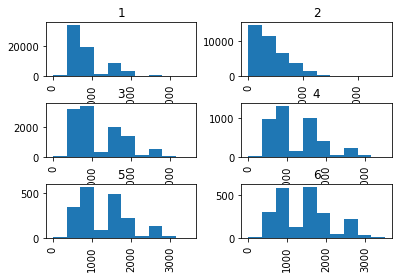

In [38]:
fig=plt.figure(figsize=(40,14))
fnl['points'].hist(by=fnl['attempts_range'])
plt.show()

<AxesSubplot:xlabel='attempts_range', ylabel='points'>

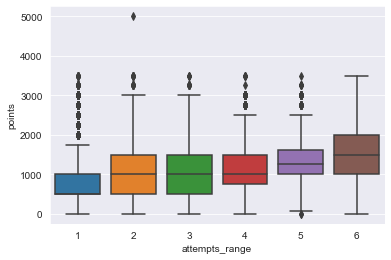

In [103]:
sns.boxplot(x='attempts_range',y='points',data=fnl)

In [104]:
fnl['points']=fnl.groupby('attempts_range')['points'].transform(lambda x:x.fillna(x.mean()))
fnl.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                     620
points                           0
tags                         15427
timespent                        0
dtype: int64

In [105]:
prblm.head(5)

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [106]:
prblm.level_type.isnull().sum()

133

In [107]:
fnl.groupby('level_type')['points'].agg(pd.Series.mean).to_frame()

,points
level_type,
A,559.041685
B,966.266154
C,1380.994470
D,1740.681957
E,1915.737730
F,1490.903863
G,1157.854967
H,1010.089619
I,1005.405151


In [108]:
prblm.groupby('level_type').agg({'points':['mean','median','min','max']})

points                        
                   mean  median     min     max
level_type                                     
A            522.310160   500.0     3.0  3000.0
B            994.860585  1000.0    -1.0  3000.0
C           1504.516000  1500.0     8.0  3000.0
D           2007.369615  2000.0   500.0  3000.0
E           2498.188406  2500.0   500.0  5000.0
F           2724.637681  2750.0   500.0  3500.0
G           2989.130435  3250.0   500.0  3500.0
H           2833.333333  3500.0  1500.0  3500.0
I                   NaN     NaN     NaN     NaN
J                   NaN     NaN     NaN     NaN
K                   NaN     NaN     NaN     NaN
L                   NaN     NaN     NaN     NaN
M                   NaN     NaN     NaN     NaN
N                   NaN     NaN     NaN     NaN

In [109]:
#point summary for level types 
fnl.groupby('level_type').agg({'points':['mean','median','min','max']})

points                                      
                   mean       median         min          max
level_type                                                   
A            559.041685   500.000000    3.000000  3000.000000
B            966.266154  1000.000000   -1.000000  3000.000000
C           1380.994470  1500.000000    8.000000  3000.000000
D           1740.681957  2000.000000  500.000000  3000.000000
E           1915.737730  2250.000000  500.000000  5000.000000
F           1490.903863  1046.629058  500.000000  3500.000000
G           1157.854967  1046.629058  500.000000  3500.000000
H           1010.089619   896.713869  896.713869  3500.000000
I           1005.405151   896.713869  896.713869  1429.213518
J           1000.573712   896.713869  896.713869  1429.213518
K           1000.337416   896.713869  896.713869  1429.213518
L           1001.701757   896.713869  896.713869  1429.213518
M            975.221001   896.713869  896.713869  1429.213518
N            980.455416   896.713869  896.713869  1241.713486

In [110]:
#Point summary for missing level_type of problem
fnl[fnl['level_type'].isnull()].agg({'points':['mean','median','min','max']})

,points
mean,805.504371
median,896.713869
min,3.000000
max,1429.213518


In [111]:
#WE cant conclude anything fromm 
#summary of missing types points and gnereal summary of points

In [112]:
fnl.dropna(subset=['level_type'],axis=0,inplace=True)
fnl.level_type.isnull().sum()

0

In [113]:
user['timespent']=pd.to_timedelta((user.last_online_time_seconds)-(user.registration_time_seconds),unit='s')


In [114]:
fnl.shape

(154675, 17)

In [115]:
fnl['days']=fnl.timespent.dt.days+ (fnl.timespent.dt.seconds / (60*60*24))

In [116]:
#converting attempts_range from integer to object
fnl['attempts_range']=fnl['attempts_range'].astype(object)

In [117]:
fnl.dtypes

user_id                               object
submission_count                       int64
problem_solved                         int64
contribution                           int64
country                               object
follower_count                         int64
last_online_time_seconds               int64
max_rating                           float64
rating                               float64
rank                                  object
registration_time_seconds              int64
problem_id                            object
attempts_range                        object
level_type                            object
points                               float64
tags                                  object
timespent                    timedelta64[ns]
days                                 float64
dtype: object

In [118]:
fnl.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37732
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                       0
points                           0
tags                         15027
timespent                        0
days                             0
dtype: int64

In [119]:
#filling missing values in tags with not_give
fnl['tags'].fillna('not_given',inplace=True)

In [120]:
#verifying for fillings
(fnl.tags=='not_given').sum()

15027

In [121]:
fnl.tags.isnull().sum()

0

Text(0.5, 1.0, 'Rankwise distribution of contribution')

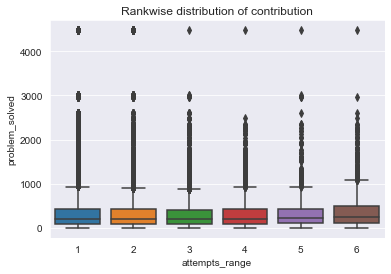

In [122]:
sns.boxplot(x='attempts_range',y='problem_solved',data=fnl)
plt.title("Rankwise distribution of contribution")

###### EDA and Statistical testing

### Analysis of target variable (Attempt range)

Analysing the distribution of attempt range

In [123]:
#Unique attempt range
print('Unique values of attempts range :',end=" ")
print(*fnl['attempts_range'].unique())

Unique values of attempts range : 1 2 4 6 3 5


<Figure size 504x288 with 0 Axes>

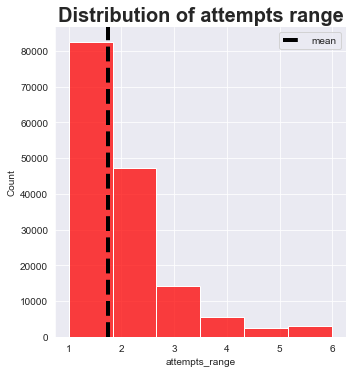

In [124]:
fig=plt.figure(figsize=(7,4))
fig.patch.set_facecolor('lightcoral')
sns.set_style('darkgrid')
sns.displot(fnl['attempts_range'],bins =6,color= 'red',kde_kws={"shade": True});
plt.axvline(x= fnl.attempts_range.mean(),ls='--',color='black',linewidth=4,label="mean")
plt.title("Distribution of attempts range",fontweight='bold',fontsize=20);
plt.legend(["mean"],prop={"size":10});
plt.show()




Attmept range is not normally distributed
It looks like right skewed

Text(0.5, 1.0, 'Box plot showing distribution of attempts range')

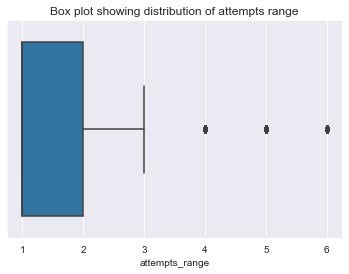

In [125]:
sns.boxplot(x='attempts_range',data=fnl)
plt.title("Box plot showing distribution of attempts range")

From the above plot we can see that attempt range is highly densed around 1 and 2.
Attempt range three has really very less observation as compared to 2 and 1
but it has decent ammount of observation as compared to 4,5,6.
Attmept range 1 has high density may be its beacause the problems are easier one to solve or expert and advanced people may solve with less attempts beacuase of expereince and people who are beginer and intermediate are may be getting easy basic level problem.

### Analysing the variable submission count

In [126]:
user.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,timespent
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,433 days 03:53:29
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325,660 days 22:27:20
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603,593 days 17:34:09
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417,1788 days 14:58:02
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498,1169 days 14:15:35


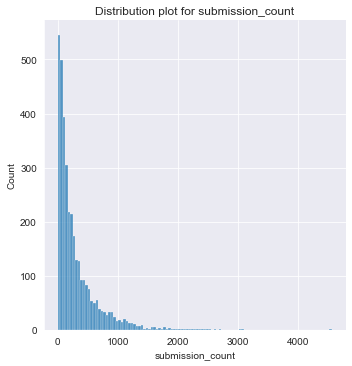

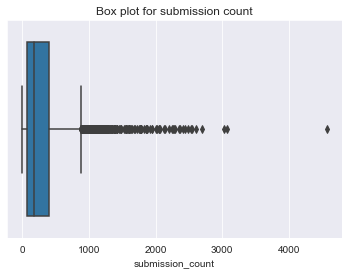

In [127]:
submsn=fnl.drop_duplicates('user_id',keep='first')
sns.displot(submsn['submission_count'])
plt.title('Distribution plot for submission_count')
plt.show()
sns.boxplot("submission_count",data=submsn)
plt.title("Box plot for submission count")
plt.show()

In [128]:
print('First Quantile of submission_count distribution is {} '.format(np.quantile(submsn['submission_count'], 0.25)))
print('Second Quantile ofsubmission_count distribution is {} '.format(np.quantile(submsn['submission_count'], 0.50)))
print('Third Quantile of submission_count distribution is {} '.format(np.quantile(submsn['submission_count'], 0.75)))
print('Forth Quantile of submission_count distribution is {} '.format(np.quantile(submsn['submission_count'], 1)))
print('Average submission_count is {} '.format(np.round(submsn['submission_count'].mean(),1)))


First Quantile of submission_count distribution is 71.0 
Second Quantile ofsubmission_count distribution is 171.0 
Third Quantile of submission_count distribution is 393.0 
Forth Quantile of submission_count distribution is 4570 
Average submission_count is 303.0 


Submission count is highly densed between 50-450
It looks like there are few outliers .
Lower quartile is at 71 and third quartile is at 393.
Average submission count is 303 with median of 171.

### Analysing the variable contribution

Text(0.5, 1.0, 'Distribution of contribution')

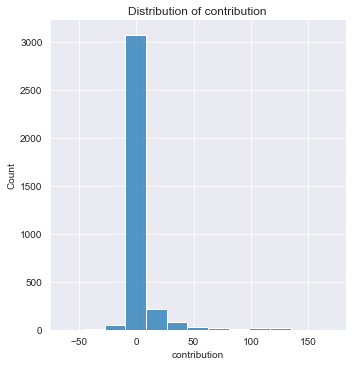

In [129]:
sns.displot(submsn['contribution'])
plt.title("Distribution of contribution")

It looks like there  are lots of zero entries. May be it could be answered by exploring user level i.e if many user belongs to beginer level then there is less chance of contributing.

### Analysing user rank and contribution

Text(0.5, 1.0, 'Rankwise distribution of contribution')

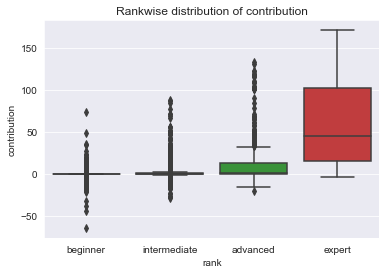

In [130]:
sns.boxplot(x='rank',y='contribution',data=submsn,order=['beginner','intermediate','advanced','expert'])
plt.title("Rankwise distribution of contribution")

In [131]:
ct=pd.crosstab(fnl['attempts_range'],fnl['rank'])
ct['Total']=ct.sum(axis=1)
colsum=ct.sum(axis=0)
print("No of obervation per attempt range based on  user rank\n",ct)
print()
print('Total no of users in each user rank')
print()
print('colsum:',colsum[[1,3,2,0]])

No of obervation per attempt range based on  user rank
 rank            advanced  beginner  expert  intermediate  Total
attempts_range                                                 
1                  16602     26991    3263         35620  82476
2                   9017     16768    1408         19942  47135
3                   2426      5303     290          6063  14082
4                    982      2058     105          2333   5478
5                    435       912      58          1079   2484
6                    660      1012      85          1263   3020

Total no of users in each user rank

colsum: rank
beginner        53044
intermediate    66300
expert           5209
advanced        30122
dtype: int64


Contributions are majorlly made by expert and few by advanced since no of users mainly belongs to beginer and intermediate level may be thats why we have large count of zero contribution

In [132]:
fnl[fnl['contribution']<0]

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags,timespent,days
59,user_1036,132,97,-1,India,23,1502985694,391.342,391.342,intermediate,1452261316,prob_75,1,A,500.000000,implementation,587 days 02:06:18,587.087708
65,user_1864,73,61,-3,NaN,7,1505583277,319.667,289.851,beginner,1468147526,prob_75,1,A,500.000000,implementation,433 days 06:49:11,433.284155
80,user_1867,66,47,-2,NaN,4,1504613917,342.890,322.248,intermediate,1439453311,prob_75,1,A,500.000000,implementation,754 days 04:10:06,754.173681
85,user_1588,127,107,-7,India,3,1502733152,304.759,222.764,beginner,1469444000,prob_75,2,A,500.000000,implementation,385 days 06:59:12,385.291111
90,user_2170,128,107,-13,NaN,1,1504464139,316.800,227.924,beginner,1449682171,prob_75,1,A,500.000000,implementation,634 days 01:12:48,634.050556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155279,user_588,280,256,-3,Vietnam,32,1505541018,516.342,492.259,advanced,1476608983,prob_5430,3,D,2000.000000,sortings,334 days 20:40:35,334.861516
155280,user_588,280,256,-3,Vietnam,32,1505541018,516.342,492.259,advanced,1476608983,prob_4306,2,D,2000.000000,"dp,matrices",334 days 20:40:35,334.861516
155281,user_588,280,256,-3,Vietnam,32,1505541018,516.342,492.259,advanced,1476608983,prob_2612,6,E,2500.000000,"data structures,dp",334 days 20:40:35,334.861516
155283,user_1629,324,301,-1,China,46,1505050989,500.573,474.484,advanced,1414162814,prob_240,2,F,1046.629058,not_given,1051 days 22:42:55,1051.946470


there are some negative entries in contribution column

### Rank of user

Text(0.5, 1.0, 'Rank mof users')

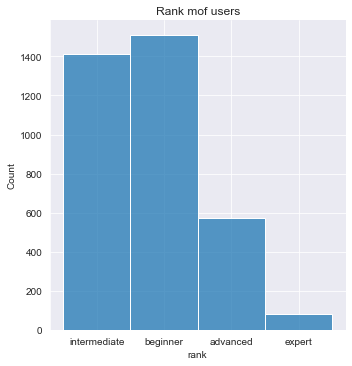

In [133]:
sns.displot(user['rank'])
plt.title("Rank mof users")

Majority of the users belongs to beginner and intermediate level.Very few observations for expert and advanced 

### Studying the relation between rank of user and attempt range

Text(0.5, 1.0, 'Rank wise count of user per attempts range')

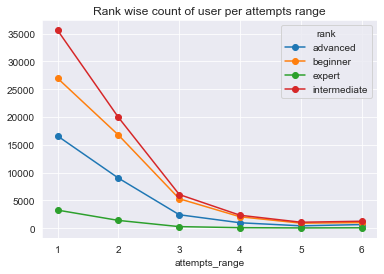

In [134]:
pd.crosstab(fnl['attempts_range'],fnl['rank']).plot(kind='line',marker='o')
plt.title('Rank wise count of user per attempts range')

While studying taregt variable we had seen that attempt range is highly distributed around 1 and 2.
Here we observe that even most of the beginer and expert takes 1 or 2 attempts to solve the problem.
The reason why many beginer and intrmediate solve problem in one attempt may be it is becaus that problems given to them are  may be simpler one to solve.

In the above plot very few expert were taking 1 and 2 attempts range.But now looking at cross table  there are very few users at expert level. May be this is why graph is showing very few pepole from exprt lvl who solved prblm within 1 or 2 attmpts range.

### Rank of user and problem leveltype

Text(0.5, 1.0, 'distribution plot of Rank of users and type of problem solved')

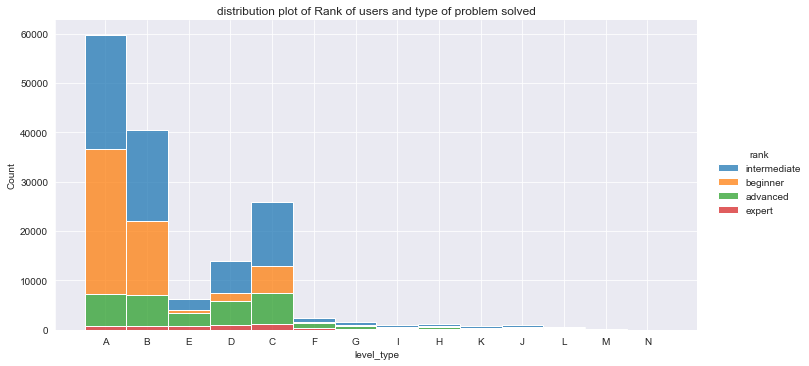

In [135]:
myvector=(['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
sns.displot(data=fnl,x='level_type',hue='rank',multiple='stack',aspect=2,col_order=['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
plt.title("distribution plot of Rank of users and type of problem solved")

Intermediate user have found trying to solve almost all type of problem
Most of the beginer are found to be solving type A,B in majority followed by type D and C
Expert have found solving problems of type between A to F

#### Analysing which country has more no of users

Text(0.5, 1.0, 'country with highest users')

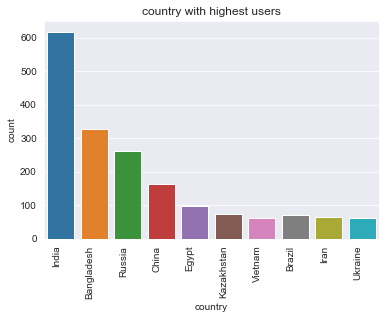

In [136]:
g=sns.countplot(x='country',data=user,order=fnl['country'].value_counts()[:10].index)
g.set_xticklabels(g.get_xticklabels(),rotation='90',ha='right')
plt.title("country with highest users")

India has highest users followed by Bangladesh and Russia where as China and Egypt stands at 4th and 5th place based on no of users.
Countries like India Bangladesh and China which are in Asia(continent) are three among 5 countries with hieghest users.

#### Comparison across levels of rank(categorical vrbl) based on timespent 

In [137]:
#formulae to convert timedelta64 to only days format (float)
user['days']=user.timespent.dt.days+ (user.timespent.dt.seconds / (60*60*24))
user['days'].head(5)



0     433.162141
1     660.935648
2     593.732049
3    1788.623634
4    1169.594155
Name: days, dtype: float64

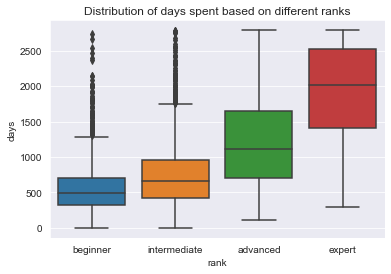

In [138]:
sns.boxplot(x='rank',y=user['days'],data=user,order=['beginner','intermediate','advanced','expert'])
plt.title("Distribution of days spent based on different ranks")
plt.show()

by looking at distribution of user levels based on time spent(i.e no of days) we can coclude that more no of time they spend on practicing in the website more skills they acquire
experts have spent on a median of 2000 days where intermediates spent 600-700
days
There are some outlier in no of days spent for beginer and intermediate level users


### Level Type

In [139]:
fnl.groupby('level_type')['attempts_range'].agg(pd.Series.mode)

level_type
A    1
B    1
C    1
D    1
E    1
F    1
G    1
H    1
I    1
J    1
K    1
L    1
M    1
N    1
Name: attempts_range, dtype: int64

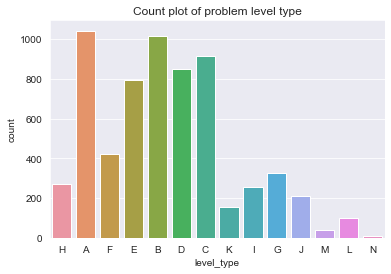

In [140]:
sns.countplot(prblm['level_type'])
plt.title("Count plot of problem level type")
plt.show()

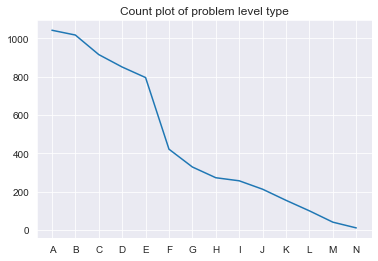

In [141]:
plt.plot(prblm.groupby('level_type')['level_type'].count())
plt.title("Count plot of problem level type")
plt.show()

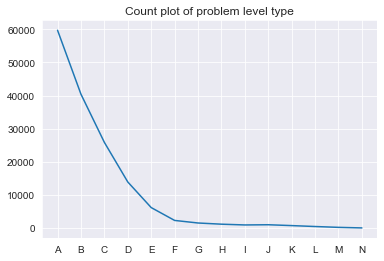

In [142]:
plt.plot(fnl.groupby('level_type')['level_type'].count())
plt.title("Count plot of problem level type")
plt.show()

Problems of leveltype between A to E has many observations where as L,M,N has least observations

### Analysis of rank and rating

Text(0.5, 1.0, 'Distribution of user ratings based on user ranks')

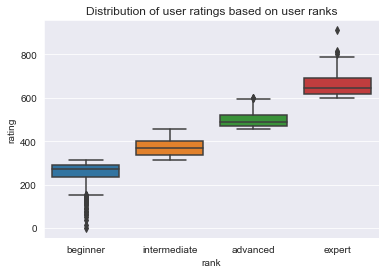

In [143]:
sns.boxplot(x='rank',y=user['rating'],data=user,order=['beginner','intermediate','advanced','expert'])
plt.title("Distribution of user ratings based on user ranks")

By looking at distribution of ratings based on rank it looks like there is some relation between these two variable. Higher the the rank higher the rating is.

<AxesSubplot:xlabel='rank', ylabel='rating'>

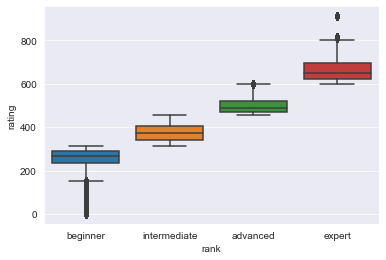

In [144]:
sns.boxplot(x='rank',y='rating',data=fnl,order=['beginner','intermediate','advanced','expert'])

Text(0.5, 1.0, 'Distribution of user ratings based on attempts range')

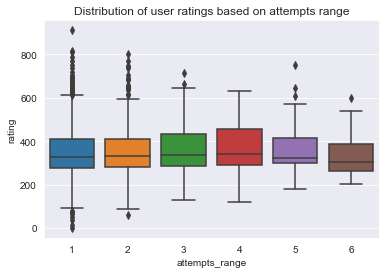

In [145]:
sns.boxplot(x='attempts_range',y=user['rating'],data=fnl,)
plt.title("Distribution of user ratings based on attempts range")

### Analysing probelm_solved and user ratings

Text(0.5, 0, 'User rating')

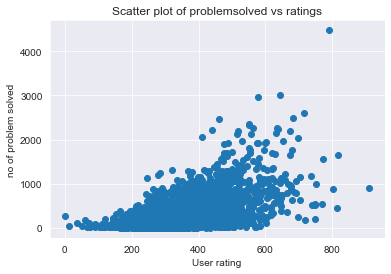

In [146]:
plt.scatter(x=user.rating,y=user.problem_solved)
plt.title('Scatter plot of problemsolved vs ratings')
plt.ylabel("no of problem solved")
plt.xlabel('User rating')

Its is hard to find relation between user rating and no of problem solved using scatter plot. Even people who have solved too few problem have good ratings

In [147]:
print(np.corrcoef(user['rating'],user['problem_solved']))

[[1.         0.55515281]
 [0.55515281 1.        ]]


Correlation coeeficient vallue is 0.55.So there is slight relation between two variable ratings and no of problem solved

### User ratings

Text(0.5, 1.0, 'Distribution of User Rating ')

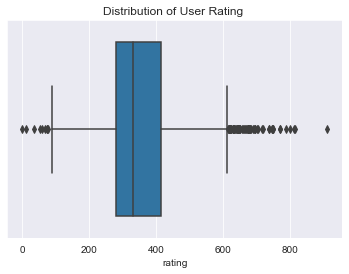

In [148]:
sns.boxplot(user.rating)
plt.title("Distribution of User Rating ")

In [149]:
print("Min of user rating",np.min(user['rating']))
print("Max of user rating",np.max(user['rating']))
print("Min  problem soplved",np.min(user['problem_solved']))
print("Max  problem solved",np.max(user['problem_solved']))



Min of user rating 0.0
Max of user rating 911.124
Min  problem soplved 0
Max  problem solved 4476


In [150]:
print('First Quantile of submission_count distribution is {} '.format(np.quantile(user['rating'], 0.25)))
print('Second Quantile ofsubmission_count distribution is {} '.format(np.quantile(user['rating'], 0.50)))
print('Third Quantile of submission_count distribution is {} '.format(np.quantile(user['rating'], 0.75)))
print('Forth Quantile of submission_count distribution is {} '.format(np.quantile(user['rating'], 1)))
print('Average submission_count is {} '.format(np.round(user['rating'].mean(),1)))

First Quantile of submission_count distribution is 279.243 
Second Quantile ofsubmission_count distribution is 329.702 
Third Quantile of submission_count distribution is 413.4175 
Forth Quantile of submission_count distribution is 911.124 
Average submission_count is 350.2 


In [151]:
user[user['rating']==0]

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,timespent,days
605,user_227,347,275,3,Romania,101,1505307769,472.19,0.0,beginner,1365247630,1621 days 01:35:39,1621.066424


In [152]:
print('Ratings')
print("1st qaurtile",np.quantile(user['rating'],0.25))
print("2nd qaurtile",np.quantile(user['rating'],0.5))
print("3rd qaurtile",np.quantile(user['rating'],0.75))
iqr=np.quantile(user['rating'],0.75)-np.quantile(user['rating'],0.25)
print('upper limit',np.quantile(user['rating'],0.75)+(1.5*iqr))
print("Lower limit",np.quantile(user['rating'],0.25)-(1.5*iqr))

Ratings
1st qaurtile 279.243
2nd qaurtile 329.702
3rd qaurtile 413.4175
upper limit 614.67925
Lower limit 77.98124999999996


25% of the ratings are bellow 279.243 ,Median rating is 329.702 , and 75% of the observations in rating is below 413.4175 

### Analysing level_type and points

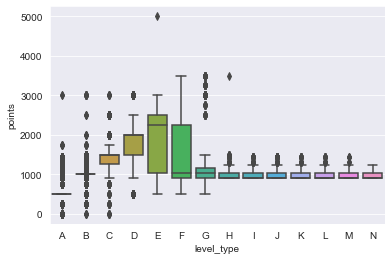

In [153]:
sns.boxplot(fnl['level_type'],fnl['points'],order=['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
plt.show()

Point are distributed between 1000 and 2500 for problems of levle type E
and for problems of type F has points distributed between 800 to 2200
Problems of level type from G to N has almost similar distributiomn of points.

### Analysing Problem solved

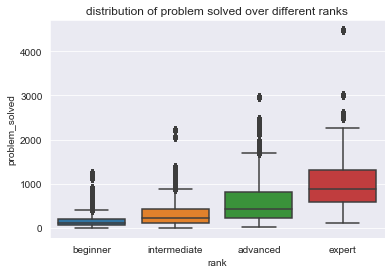

In [154]:
sns.boxplot(y='problem_solved',x='rank',data=fnl,order=['beginner','intermediate','advanced','expert'])
plt.title("distribution of problem solved over different ranks")
plt.show()

Experts are found to be solving more no of problem and users from adnaced category found to be second most problem solvers and distribution of problem solved found to be very less in beginer and inter mediate.

In [155]:
fnl.isnull().sum()

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37732
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
attempts_range                   0
level_type                       0
points                           0
tags                             0
timespent                        0
days                             0
dtype: int64

### Statistical Testing

##### Testing the independence of user rank and problem level type
###### H0: There is no significant relationship between problem level_type and user rank
###### H1: There is significant relationship between problem level_type and user rank

In [156]:
tst1=fnl[fnl['level_type'].isin(['A','B','C','D','E','F','G'])]

In [157]:
crs1=pd.crosstab(tst1['rank'],tst1['level_type'],margins=True)
crs1


level_type,A,B,C,D,E,F,G,All
rank,,,,,,,,
advanced,6492,6276,6427,4829,2713,1002,634,28373
beginner,29455,14951,5329,1690,559,219,183,52386
expert,794,772,1075,985,693,313,182,4814
intermediate,22977,18420,13045,6421,2232,784,545,64424
All,59718,40419,25876,13925,6197,2318,1544,149997


In [158]:
obs=np.array(crs1.iloc[0:4,:7])

stat.chi2_contingency(obs)[0:3]

(21573.86131855569, 0.0, 18)

###### P value is 0 so we reject the null hypothesis and conclude that user level and problem type are associated.

Cramer V test

In [159]:
min_dimnsn=np.min(obs.shape)-1
min_dimnsn

3

In [160]:
cramerv=np.sqrt((stat.chi2_contingency(obs)[0]/np.sum(obs))/min_dimnsn)
cramerv

0.21895861001269815

###### CramerV value is almost nearer to 0.2 so we conclude that there is a weak  relation between probelm level type and user rank

# Testing the independence of user rank and Attempt range
###### H0: There is no significant relationship between attempts range and user rank
###### H1: There is significant relationship between attempts range and user rank

In [161]:
crs2=pd.crosstab(fnl['rank'],fnl['attempts_range'])
crs2

attempts_range,1,2,3,4,5,6
rank,,,,,,
advanced,16602,9017,2426,982,435,660
beginner,26991,16768,5303,2058,912,1012
expert,3263,1408,290,105,58,85
intermediate,35620,19942,6063,2333,1079,1263


In [162]:
stat.chi2_contingency(crs2)

(456.1746093160834,
 1.0255713829788438e-87,
 15,
 array([[16061.69110716,  9179.24984645,  2742.3824406 ,  1066.80663326,
           483.74364312,   588.1263294 ],
        [28284.1890674 , 16164.40239211,  4829.25882011,  1878.61666074,
           851.85903346,  1035.67402618],
        [ 2777.54959754,  1587.36844998,   474.2404267 ,   184.48296105,
            83.653829  ,   101.70473574],
        [35352.5702279 , 20203.97931146,  6036.11831259,  2348.09374495,
          1064.74349442,  1294.49490868]]))

###### P value is less than 0.05 so we reject the null hypothesis and conclude that user level and attempts_range are associated.

In [163]:
min_dimnsn=np.min(crs2.shape)-1
min_dimnsn

3

In [164]:
cramerv=np.sqrt((stat.chi2_contingency(crs2)[0]/sum(np.sum(crs2)))/min_dimnsn)
cramerv

0.03135413794210461

###### cramer_v value is 0.0314 which is very low so we conclude that there is a weak relationship between user rank and attempts range

### Testing the relation between user_rank  and problem_solved

###### Testing assumption of anova

In [165]:
# Normality

###### H0:There is no significant difference among group means
###### H1 : There is a significant difference among group means for atleaast two groups

In [166]:
#To get rid of repeated observation in dataframe
fn_1=fnl.copy()
fn_1.drop_duplicates(subset='user_id',keep='first',inplace=True)


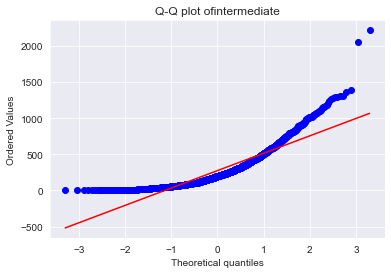

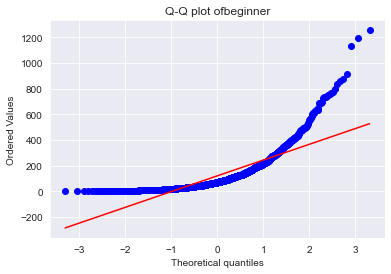

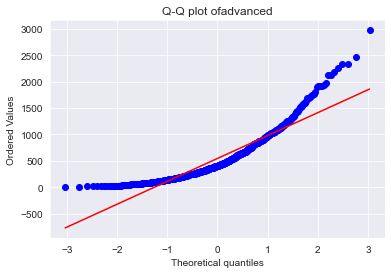

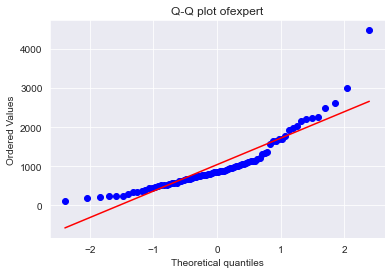

In [168]:
#Checking for  normality
for i in fn_1['rank'].unique():
        stat.probplot(fn_1[fn_1['rank']==i]['problem_solved'],dist='norm',plot=plt)
        plt.title('Q-Q plot of' + i)
        plt.show()

In [169]:
print("No of observation for each values of categorical variable rank")
fnl['rank'].value_counts()

No of observation for each values of categorical variable rank


intermediate    66300
beginner        53044
advanced        30122
expert           5209
Name: rank, dtype: int64

Since observation are large enough we assume that data is normally distributed

In [170]:
# Variance

###### H0: Groups have equall variance
###### H1: Atleast one group has different variance compared to others

In [171]:
fnl.groupby('rank')['problem_solved'].std().nlargest()

rank
expert          768.343682
advanced        477.676716
intermediate    259.947050
beginner        152.189074
Name: problem_solved, dtype: float64

In [172]:
#Homogenity of variance
fn_1.groupby('rank')['problem_solved'].std().max()/fn_1.groupby('rank')['problem_solved'].std().min()

5.021383265195975

Ratio is 5.02 which is greater than threshold value 2 
Assumption of homogenity in variance doesnt holds so we go for non parametric test

In [173]:
fn=fnl.copy()

In [174]:
fn.drop_duplicates(subset='user_id',keep='first',inplace=True)

In [175]:
k=[]
for i in fn['rank'].unique():
    k.append(fn[fn['rank']==i]['problem_solved'])

In [176]:
stat.bartlett(k[0],k[1],k[2],k[3])

BartlettResult(statistic=1602.6492977097962, pvalue=0.0)

###### Here p value is less than 0.05 so we reject the null hypothesis and conclude that group variance are not equall for all the groups

In [177]:
#Assumptions of anova are failed lets go for alternative non parametric test

###### Ho:The median is same for all the data groups

###### H1:The median is not same for all data group

In [178]:
stat.kruskal(k[0],k[1],k[2],k[3])

KruskalResult(statistic=996.4395456079167, pvalue=1.0653753085302547e-215)

###### Here p value is less than 0.05 so we rejct the null hypothesis and conclude that median is not same for all the groups

In [179]:
fnl.head(3)

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags,timespent,days
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A,500.0,implementation,433 days 03:53:29,433.162141
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A,500.0,implementation,755 days 02:20:32,755.097593
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A,500.0,implementation,722 days 13:58:19,722.582164


### Relation between Problem_solved and attempts_range

In [180]:
print("Attempts_rangte" ," ",'no of observations')
for i in fnl['attempts_range'].unique():
     print("    ",i,"                 ",(fnl['attempts_range']==i).sum())

Attempts_rangte   no of observations
     1                   82476
     2                   47135
     4                   5478
     6                   3020
     3                   14082
     5                   2484


Since observations are large we assume that data is from normal population

###### Ho:All groups have equall variance
###### H1:At least one group has a variance that is not equal to the rest.

In [181]:
# TEsting second assumption of anova (equality of variance)
# Bartlett test
lst=[]
for i in fnl['attempts_range'].unique():
       lst.append(fnl[fnl['attempts_range']==i]['problem_solved'])

stat.bartlett(lst[0],lst[1],lst[2],lst[3],lst[4],lst[5])

BartlettResult(statistic=603.2942526532659, pvalue=3.9272447030076706e-128)

###### P value is less than 0.05 so we reject null hypothesis and conclude that all group variance are not equall.Assumption for anova fails So we go for non parametric test

###### H0:Median is same for grorups
###### H1:Median is not same for all data group

In [182]:
stat.kruskal(lst[0],lst[1],lst[2],lst[3],lst[4],lst[5])

KruskalResult(statistic=84.8122829150244, pvalue=8.241820096288942e-17)

###### Here p value is less than 0.05 so we reject null hypothesis and conclude that  median is not same for all the group 

#### Log linear model 

# To check whether there is any relation between attempt_range and level_type

In [183]:
crstab4=pd.crosstab(fnl['attempts_range'],fnl['level_type'])
crstab4

level_type,A,B,C,D,E,F,G,H,I,J,K,L,M,N
attempts_range,,,,,,,,,,,,,,
1,37407,21091,11588,5865,2383,945,750,616,478,545,388,245,142,33
2,16324,12691,8617,4742,2125,744,474,346,300,292,246,160,57,17
3,3825,3812,3004,1752,814,305,158,99,96,90,70,34,17,6
4,1208,1475,1265,745,360,131,76,81,44,39,28,19,5,2
5,472,661,607,358,197,77,38,17,17,19,10,9,2,0
6,482,689,795,463,318,116,48,25,20,30,17,13,4,0


In [184]:
stat.chi2_contingency(crstab4)

(5926.309306591319,
 0.0,
 65,
 array([[3.18429078e+04, 2.15522705e+04, 1.37976336e+04, 7.42510619e+03,
         3.30437221e+03, 1.23600690e+03, 8.23293642e+02, 6.31333984e+02,
         5.09226313e+02, 5.41219589e+02, 4.04714944e+02, 2.55946210e+02,
         1.21041228e+02, 3.09268337e+01],
        [1.81982087e+04, 1.23171137e+04, 7.88534191e+03, 4.24344513e+03,
         1.88844736e+03, 7.06377437e+02, 4.70511977e+02, 3.60807112e+02,
         2.91022628e+02, 3.09306772e+02, 2.31294424e+02, 1.46273153e+02,
         6.91750121e+01, 1.76746727e+01],
        [5.43687652e+03, 3.67984715e+03, 2.35581595e+03, 1.26776693e+03,
         5.64190425e+02, 2.11036535e+02, 1.40569633e+02, 1.07794330e+02,
         8.69455956e+01, 9.24081461e+01, 6.91012639e+01, 4.37004041e+01,
         2.06666494e+01, 5.28046549e+00],
        [2.11498435e+03, 1.43148720e+03, 9.16429468e+02, 4.93170519e+02,
         2.19474162e+02, 8.20947406e+01, 5.46826055e+01, 4.19327752e+01,
         3.38224665e+01, 3.59474382e+01,

In [185]:
Pi=[]
for i in range (crstab4.shape[0]):
    Pi.append((crstab4.iloc[i,].sum())/crstab4.sum().sum())
    
Pj=[]
for j in range(crstab4.shape[1]):
    Pj.append((crstab4.iloc[:,j].sum())/crstab4.sum().sum())

lambda_x=[]
sum_log_pi=0
for i in Pi:
    sum_log_pi+=np.log(i)
for i in Pi:
    lambda_x.append(np.log(i)-((sum_log_pi)/crstab4.shape[0]))
lambda_y=[]
sum_log_pj=0
for j in Pj:
    sum_log_pj+=np.log(j)
for j in Pj:
    lambda_y.append(np.log(j)-(sum_log_pj/crstab4.shape[1]))
mu_estimate=np.log(crstab4.sum().sum())+(sum_log_pi/crstab4.shape[0])+(sum_log_pj/crstab4.shape[1])



In [186]:
efrqncy=pd.DataFrame(np.zeros(shape=(crstab4.shape[0],crstab4.shape[1])))
efrqncy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
for i in range(6):
    for j in range(14):
        efrqncy.iloc[i,j]=np.exp(mu_estimate+lambda_x[i]+lambda_y[j])
efrqncy     

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,31842.907826,21552.270529,13797.633593,7425.106190,3304.372213,1236.006905,823.293642,631.333984,509.226313,541.219589,404.714944,255.946210,121.041228,30.926834
1,18198.208696,12317.113722,7885.341910,4243.445127,1888.447357,706.377437,470.511977,360.807112,291.022628,309.306772,231.294424,146.273153,69.175012,17.674673
2,5436.876522,3679.847150,2355.815950,1267.766931,564.190425,211.036535,140.569633,107.794330,86.945596,92.408146,69.101264,43.700404,20.666649,5.280465
3,2114.984348,1431.487196,916.429468,493.170519,219.474162,82.094741,54.682605,41.932775,33.822466,35.947438,26.880892,16.999774,8.039476,2.054139
4,959.040000,649.108104,415.555093,223.628253,99.520595,37.225874,24.795836,19.014424,15.336803,16.300372,12.189145,7.708550,3.645502,0.931450
5,1165.982609,789.173299,505.223986,271.882980,120.995248,45.258510,30.146307,23.117375,18.646194,19.817682,14.819331,9.371909,4.432132,1.132439


In [188]:
chi2_stat=0
for i in range(6):
    for j in range(14):
        chi2_stat+=(np.square(crstab4.iloc[i,j]-efrqncy.iloc[i,j]))/efrqncy.iloc[i,j]

In [189]:
chi2_stat

5926.309306591315

In [190]:
g=pd.DataFrame(np.zeros(shape=(crstab4.shape[0],crstab4.shape[1])))

In [191]:
for i in range(6):
    for j in range(14):
         g.iloc[i,j]=(crstab4.iloc[i,j])*(np.log(crstab4.iloc[i,j]/efrqncy.iloc[i,j]))

In [192]:
G=2*g.sum().sum()
G

5905.42240811896

In [193]:
df=crstab4.shape[0]*crstab4.shape[1]-(1+crstab4.shape[0]-1+crstab4.shape[1]-1)
df

65

In [194]:
from scipy.stats.distributions import chi2
chi2.sf(5926.309306591315,65)

0.0

In [195]:
chi2.sf(5905.42240811896,65)

0.0

###### P value is 0 which is less than 0.05 so we reject null hypotheis and  cocnlude that  mean attempts range is not same for all problem_type.

#### Days and attempts range

In [196]:
#Anova assumption testing

In [197]:
k=[]
for i in fnl['attempts_range'].unique():
    k.append(fnl[fnl['attempts_range']==i]['days'])

In [198]:
stat.bartlett(k[0],k[1],k[2],k[3],k[4],k[5])

BartlettResult(statistic=756.4297953736315, pvalue=3.0764508321480157e-161)

In [199]:
#canot carry anova

In [200]:
stat.kruskal(k[0],k[1],k[2],k[3],k[4],k[5])

KruskalResult(statistic=272.431118627788, pvalue=8.41030431084778e-57)

##### p value is less than 0.05 so so there is relation

#### follower count

In [201]:
k=[]
for i in fnl['attempts_range'].unique():
    k.append(fnl[fnl['attempts_range']==i]['follower_count'])

In [202]:
stat.bartlett(k[0],k[1],k[2],k[3],k[4],k[5])

BartlettResult(statistic=8490.856367309114, pvalue=0.0)

In [203]:
#Variance is less not constant so go for nonprmtrc

In [204]:
stat.kruskal(k[0],k[1],k[2],k[3],k[4],k[5])

KruskalResult(statistic=106.79332153108783, pvalue=1.9494035247446547e-21)

In [205]:
fnl.head(1)

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags,timespent,days
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A,500.0,implementation,433 days 03:53:29,433.162141


##### p value is less than 0.05 so so there is relation

## ordinal regression testing

In [206]:
df1=fnl[['submission_count','rating','points','max_rating','attempts_range']]
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=[1,2,3,4,5,6], ordered=True)
df1["attempts_range"] = df1["attempts_range"].astype(cat_type)


In [207]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# submsn

In [208]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df1['attempts_range'],
                        df1['submission_count'],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.177035
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         attempts_range   Log-Likelihood:            -1.8206e+05
Model:                   OrderedModel   AIC:                         3.641e+05
Method:            Maximum Likelihood   BIC:                         3.642e+05
Date:                Wed, 09 Aug 2023                                         
Time:                        21:28:26                                         
No. Observations:              154675                                         
Df Residuals:                  154669                                         
Df Model:                           1                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
submission_count -3.494e-05   7.35e-06     -4.754      0.000   -4.93e-05   -2.05e-05
1/2                  0.0704      0.004     16.783      0.000       0.062       0.079
2/3                 -0.1022      0.004    -25.287      0.000      -0.110      -0.094
3/4                 -0.7292      0.008    -91.953      0.000      -0.745      -0.714
4/5                 -1.0908      0.013    -83.855      0.000      -1.116      -1.065
5/6                 -1.3501      0.020    -69.143      0.000      -1.388      -1.312
====================================================================================
"""

In [209]:
#There is relation

0.9999650606103947

### ratings

In [210]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df1['attempts_range'],
                        df1['rating'],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.175954
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         attempts_range   Log-Likelihood:            -1.8189e+05
Model:                   OrderedModel   AIC:                         3.638e+05
Method:            Maximum Likelihood   BIC:                         3.639e+05
Date:                Wed, 09 Aug 2023                                         
Time:                        21:28:34                                         
No. Observations:              154675                                         
Df Residuals:                  154669                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rating        -0.0005   2.61e-05    -18.869      0.000      -0.001      -0.000
1/2           -0.0977      0.010     -9.672      0.000      -0.117      -0.078
2/3           -0.1006      0.004    -24.891      0.000      -0.109      -0.093
3/4           -0.7280      0.008    -91.815      0.000      -0.744      -0.712
4/5           -1.0905      0.013    -83.837      0.000      -1.116      -1.065
5/6           -1.3507      0.020    -69.165      0.000      -1.389      -1.312
==============================================================================
"""

In [232]:
res_prob.print_summary()

AttributeError: 'OrderedResults' object has no attribute 'print_summary'

In [211]:
# Pvalue is 0.0 so reltion exist

# Points

In [212]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df1['attempts_range'],
                        df1['points'],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.147640
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         attempts_range   Log-Likelihood:            -1.7751e+05
Model:                   OrderedModel   AIC:                         3.550e+05
Method:            Maximum Likelihood   BIC:                         3.551e+05
Date:                Wed, 09 Aug 2023                                         
Time:                        21:28:46                                         
No. Observations:              154675                                         
Df Residuals:                  154669                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
points         0.0005   5.56e-06     95.522      0.000       0.001       0.001
1/2            0.6131      0.006     94.981      0.000       0.600       0.626
2/3           -0.0635      0.004    -15.714      0.000      -0.071      -0.056
3/4           -0.6847      0.008    -86.556      0.000      -0.700      -0.669
4/5           -1.0424      0.013    -80.344      0.000      -1.068      -1.017
5/6           -1.2988      0.019    -66.673      0.000      -1.337      -1.261
==============================================================================
"""

In [213]:
#relation exist

# max_ratings

In [214]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df1['attempts_range'],
                        df1['max_rating'],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.175761
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         attempts_range   Log-Likelihood:            -1.8186e+05
Model:                   OrderedModel   AIC:                         3.637e+05
Method:            Maximum Likelihood   BIC:                         3.638e+05
Date:                Wed, 09 Aug 2023                                         
Time:                        21:28:55                                         
No. Observations:              154675                                         
Df Residuals:                  154669                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
max_rating    -0.0006   2.95e-05    -20.352      0.000      -0.001      -0.001
1/2           -0.1613      0.012    -12.984      0.000      -0.186      -0.137
2/3           -0.1003      0.004    -24.825      0.000      -0.108      -0.092
3/4           -0.7278      0.008    -91.784      0.000      -0.743      -0.712
4/5           -1.0903      0.013    -83.825      0.000      -1.116      -1.065
5/6           -1.3507      0.020    -69.164      0.000      -1.389      -1.312
==============================================================================
"""

In [215]:
pip install --upgrade --no-deps statsmodels

Note: you may need to restart the kernel to use updated packages.


In [216]:
fnl.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags,timespent,days
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A,500.0,implementation,433 days 03:53:29,433.162141
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A,500.0,implementation,755 days 02:20:32,755.097593
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A,500.0,implementation,722 days 13:58:19,722.582164
3,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_75,1,A,500.0,implementation,886 days 02:50:05,886.118113
4,user_872,113,95,0,Bangladesh,7,1504977695,314.220,89.163,beginner,1480081730,prob_75,1,A,500.0,implementation,288 days 03:32:45,288.147743


###### Contribution columns was left uncleand so we are  taking care of it

In [217]:
# Investigating negative values in contribution columns
user[user['contribution']<0]['rank'].value_counts()

intermediate    116
beginner        107
advanced         15
expert            1
Name: rank, dtype: int64

In [218]:
#Unique negative values
user[user['contribution']<0]['contribution'].unique()

array([ -8,  -3,  -1,  -4, -11,  -2,  -7, -15,  -9, -22,  -5, -12,  -6,
       -13, -14, -16, -10, -32, -20, -19, -24, -18, -17, -28, -38, -26,
       -27, -64, -21, -44], dtype=int64)

In [219]:
user[user['contribution']==-44]

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,timespent,days
3474,user_1213,1270,1192,-44,Syria,41,1505512827,331.135,280.103,beginner,1427122828,907 days 06:59:59,907.291655


Text(0, 0.5, 'rating')

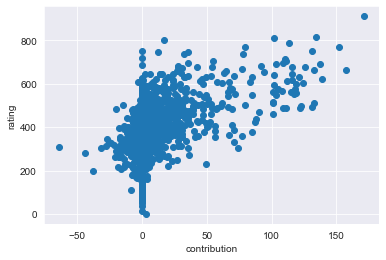

In [220]:
#comparing cntrbtn wiht rating
plt.scatter(user['contribution'],user['rating'])
plt.xlabel("contribution")
plt.ylabel("rating")

Can't figure out any strong relation

In [221]:
# checking relation  between attempt range and contribution
k=[]
for i in fnl['attempts_range'].unique():
    k.append(fnl[fnl['attempts_range']==i]['contribution'])
stat.kruskal(k[0],k[1],k[2],k[3],k[4],k[5])

KruskalResult(statistic=123.53232472060608, pvalue=5.601312544492822e-25)

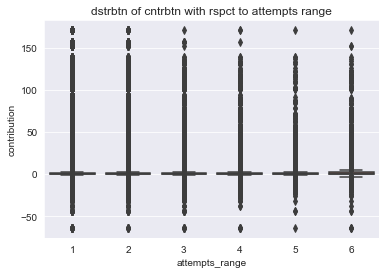

In [222]:
sns.boxplot(y='contribution',x='attempts_range',data=fnl)
plt.title("dstrbtn of cntrbtn with rspct to attempts range")
plt.show()

In [223]:
print("Shape of data file user",user.shape)
print("no of zero observation in contribution column of user data file",(user['contribution']==0).sum())

Shape of data file user (3571, 13)
no of zero observation in contribution column of user data file 2530


In [224]:
print("percentage of observation zero in contribution column",100*2530/3571)

percentage of observation zero in contribution column 70.84850182021843


Almost 71% of observations in user columns has value 0 so we deccide to drop contribution column

###### We have completed our eda and Statitical analysis

In [225]:
#Lets drop some columns which are of less use
df=fnl.copy()

In [226]:
df.drop(["user_id","contribution",'country','last_online_time_seconds','registration_time_seconds','timespent'],axis=1,inplace=True)

In [227]:
#After droping some of the columns
df.head(3)

,submission_count,problem_solved,follower_count,max_rating,rating,rank,problem_id,attempts_range,level_type,points,tags,days
0,47,40,4,348.337,330.849,intermediate,prob_75,1,A,500.0,implementation,433.162141
1,107,99,11,304.186,203.842,beginner,prob_75,2,A,500.0,implementation,755.097593
2,735,715,9,419.438,353.211,intermediate,prob_75,2,A,500.0,implementation,722.582164


In [228]:
#lets save this data file and we will continue our model building in new file

In [229]:
df.to_csv("D:\Final project 4th sem\mp.csv")

In [230]:
fnl['attempts_range'].value_counts()

1    82476
2    47135
3    14082
4     5478
6     3020
5     2484
Name: attempts_range, dtype: int64

In [231]:
fnl['attempts_range'].value_counts()

1    82476
2    47135
3    14082
4     5478
6     3020
5     2484
Name: attempts_range, dtype: int64